In [20]:
import graphviz 
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
from subprocess import check_call
from io import StringIO
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from timeit import default_timer as timer

filename = 'day21_run1_samples9_points150.csv' # designate filename
rawdf = pd.read_table(filename, error_bad_lines=False, delimiter = ',') #read in file
print(rawdf)

      Seconds  Sample    MQ2    MQ4    MQ5    MQ7  Day  Hop  Alpha  Beta  \
0      1163.2       1  1.040  0.750  0.515  0.965   21    1   12.3   3.6   
1      1164.0       1  1.040  0.760  0.515  0.965   21    1   12.3   3.6   
2      1164.8       1  1.040  0.760  0.515  0.965   21    1   12.3   3.6   
3      1165.6       1  1.040  0.755  0.515  0.965   21    1   12.3   3.6   
4      1166.4       1  1.040  0.760  0.520  0.965   21    1   12.3   3.6   
5      1167.2       1  1.040  0.760  0.515  0.965   21    1   12.3   3.6   
6      1168.0       1  1.040  0.755  0.515  0.975   21    1   12.3   3.6   
7      1168.8       1  1.040  0.755  0.515  0.965   21    1   12.3   3.6   
8      1169.6       1  1.035  0.755  0.515  0.965   21    1   12.3   3.6   
9      1170.4       1  1.030  0.760  0.515  0.965   21    1   12.3   3.6   
10     1171.2       1  1.040  0.750  0.520  0.970   21    1   12.3   3.6   
11     1172.1       1  1.035  0.755  0.520  0.970   21    1   12.3   3.6   
12     1172.

In [21]:
# identify classes and input matrix
labels = np.array(rawdf['Hop']) #set classes as labels
#df = rawdf.drop('hop', 1) #remove class numbers from data matrix

mq2 = np.array(rawdf['MQ2'])
mq5 = np.array(rawdf['MQ5'])
mq7 = np.array(rawdf['MQ7'])

#sensor = list(sensordata)
sensordata = [mq2, mq5, mq7] #list of sensor names
sensor = ['mq2', 'mq5', 'mq7']

# Use decision tree and print decision flowchart
X = np.array(sensordata).T
y = labels

starttime = timer() #start timer

clf = tree.DecisionTreeClassifier(max_depth=7).fit(X, y)
print('classification score = ' + format(round(clf.score(X,y),4)))

dot_data = tree.export_graphviz(clf, out_file=None, #organize printed decision tree
                         feature_names=sensor,  
                         class_names=np.unique(labels.astype(str)),  
                         filled=True, rounded=True) 

decisiongraph = graphviz.Source(dot_data)  

endtime = timer()  #end timer
elapsedtime = (endtime - starttime) #total time in sec
print('time (sec) = ' + format(elapsedtime))

#uncomment this to show tree:
#decisiongraph


classification score = 0.9548
time (sec) = 0.009269612872685684


In [160]:
testdf = pd.read_table('hop_all_peak_data_all_days.csv', error_bad_lines=False, delimiter = ',') #read in file
testdf

,time,samplenumber,mq2,mq4,mq5,mq7,day,hop,alpha,beta
0,1155.2,1,0.900,0.625,0.350,1.135,4,1,12.3,3.6
1,1156.0,1,0.900,0.620,0.355,1.135,4,1,12.3,3.6
2,1156.8,1,0.900,0.620,0.355,1.135,4,1,12.3,3.6
3,1157.6,1,0.900,0.625,0.345,1.135,4,1,12.3,3.6
4,1158.4,1,0.905,0.615,0.340,1.135,4,1,12.3,3.6
5,1159.2,1,0.900,0.615,0.335,1.135,4,1,12.3,3.6
6,1160.0,1,0.905,0.625,0.340,1.135,4,1,12.3,3.6
7,1160.8,1,0.905,0.625,0.345,1.135,4,1,12.3,3.6
8,1161.6,1,0.905,0.620,0.340,1.135,4,1,12.3,3.6
9,1162.4,1,0.910,0.625,0.345,1.135,4,1,12.3,3.6


In [177]:
mq2test = np.array(testdf['mq2'])
mq5test = np.array(testdf['mq5'])
mq7test = np.array(testdf['mq7'])

hoptest = np.array(np.array(testdf['hop']))

testinputs = [mq2test, mq5test, mq7test]
testinputs = np.array(testinputs).T

X = testinputs
y = hoptest

In [178]:
clf = tree.DecisionTreeClassifier(max_depth=15).fit(X, y)
print('classification score = ' + format(round(clf.score(X,y),4)))

classification score = 0.9867


SVC with linear kernel score = 0.5043703703703704
LinearSVC (linear kernel) score = 0.4693333333333333
SVC with RBF kernel score = 0.5048888888888889
SVC with polynomial kernel score = 0.48792592592592593


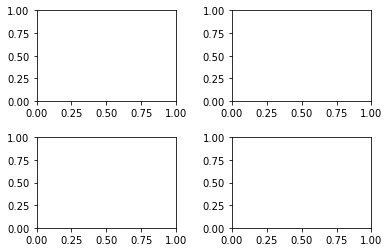

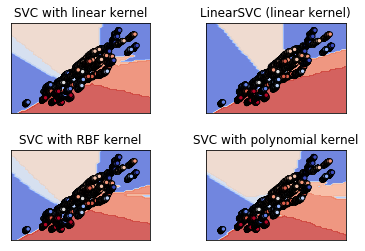

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

## SVM ##################
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

h = .01  # step size in the mesh

testinputs2 = [mq2test, mq7test]
testinputs2 = np.array(testinputs2).T
X = testinputs2

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#    ax.set_xlabel('Sepal length')
#    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    print(title + ' score = ' + format(clf.score(X,y)))
plt.show()

[ 0.90576862  0.08794511  0.00628627]


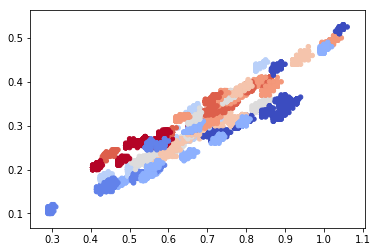

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)


print(pca.explained_variance_ratio_)  

np.sum(np.array(pca.explained_variance_ratio_))


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#plot_contoursbest(bestmodel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20)#, edgecolors='k')

plt.show()

In [ ]:
###PCA then Tree

